In [73]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


# 1.Load Dataset

In [74]:
training_data_dir = "/home/aurore/code/afallo/brain_tumor_detection_project/raw_data/classification/Training/"
testing_data_dir = "/home/aurore/code/afallo/brain_tumor_detection_project/raw_data/classification/Testing/"

In [75]:
img = load_img(f"{training_data_dir}notumor/BRISC_brisc2025_train_02477_no_ax_t1.jpg")
x = img_to_array(img)/255  # We divide the pixel value by 255 to end up between 0 and 1

In [76]:
img

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=216x369>

In [77]:
x.shape

(369, 216, 3)

## 1.1 Dataframe creation with images paths and label



In [78]:
def path_df(tr_path):
    classes = []
    class_paths = []

    for label in os.listdir(tr_path):
        folder = os.path.join(tr_path, label)
        if os.path.isdir(folder):
            for image in os.listdir(folder):
                classes.append(label)
                class_paths.append(os.path.join(folder, image))

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df


In [79]:
training_df = path_df(training_data_dir)

In [80]:
training_df


,Class Path,Class
0,/home/aurore/code/afallo/brain_tumor_detection...,glioma
1,/home/aurore/code/afallo/brain_tumor_detection...,glioma
2,/home/aurore/code/afallo/brain_tumor_detection...,glioma
3,/home/aurore/code/afallo/brain_tumor_detection...,glioma
4,/home/aurore/code/afallo/brain_tumor_detection...,glioma
...,...,...
11405,/home/aurore/code/afallo/brain_tumor_detection...,notumor
11406,/home/aurore/code/afallo/brain_tumor_detection...,notumor
11407,/home/aurore/code/afallo/brain_tumor_detection...,notumor
11408,/home/aurore/code/afallo/brain_tumor_detection...,notumor


In [81]:
testing_df = path_df(testing_data_dir)

In [82]:
def label(x):
    if x=="glioma"or x=="meningioma" or x=="pituitary" :
        x = "tumor"
    return x

In [83]:
training_df["Class"] = training_df["Class"].apply(label)
training_df

,Class Path,Class
0,/home/aurore/code/afallo/brain_tumor_detection...,tumor
1,/home/aurore/code/afallo/brain_tumor_detection...,tumor
2,/home/aurore/code/afallo/brain_tumor_detection...,tumor
3,/home/aurore/code/afallo/brain_tumor_detection...,tumor
4,/home/aurore/code/afallo/brain_tumor_detection...,tumor
...,...,...
11405,/home/aurore/code/afallo/brain_tumor_detection...,notumor
11406,/home/aurore/code/afallo/brain_tumor_detection...,notumor
11407,/home/aurore/code/afallo/brain_tumor_detection...,notumor
11408,/home/aurore/code/afallo/brain_tumor_detection...,notumor


In [84]:
testing_df["Class"] = testing_df["Class"].apply(label)
testing_df

,Class Path,Class
0,/home/aurore/code/afallo/brain_tumor_detection...,tumor
1,/home/aurore/code/afallo/brain_tumor_detection...,tumor
2,/home/aurore/code/afallo/brain_tumor_detection...,tumor
3,/home/aurore/code/afallo/brain_tumor_detection...,tumor
4,/home/aurore/code/afallo/brain_tumor_detection...,tumor
...,...,...
2492,/home/aurore/code/afallo/brain_tumor_detection...,notumor
2493,/home/aurore/code/afallo/brain_tumor_detection...,notumor
2494,/home/aurore/code/afallo/brain_tumor_detection...,notumor
2495,/home/aurore/code/afallo/brain_tumor_detection...,notumor


# 2.Train val test split

In [137]:
val_df, train_df = train_test_split(training_df, train_size=0.3, stratify=training_df['Class'], random_state=42)

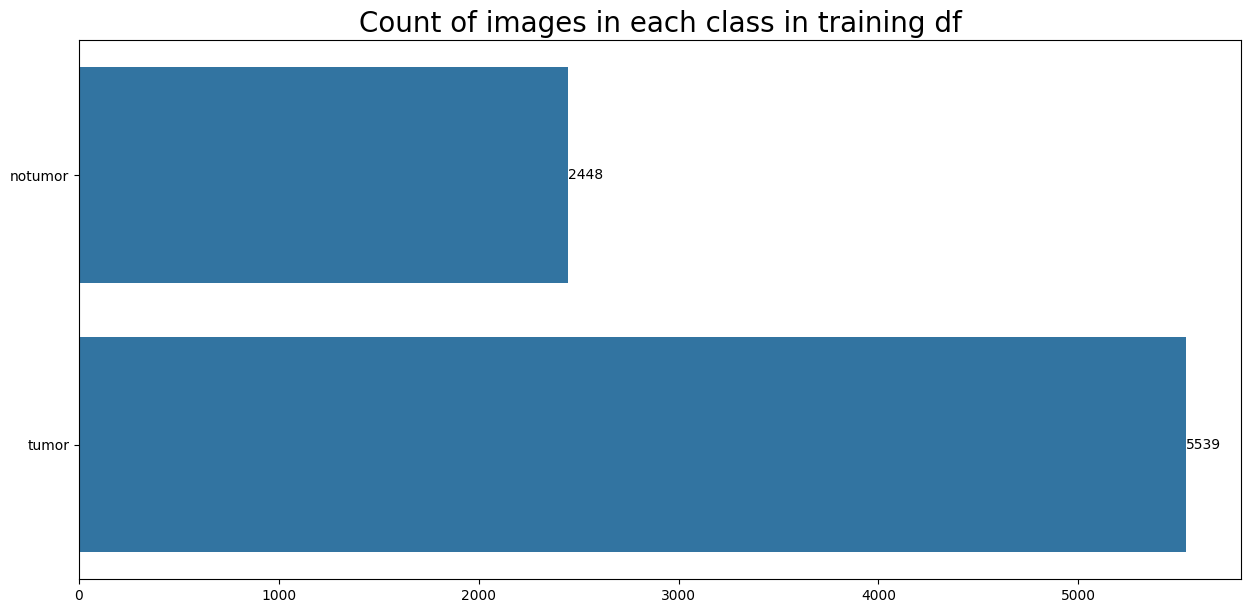

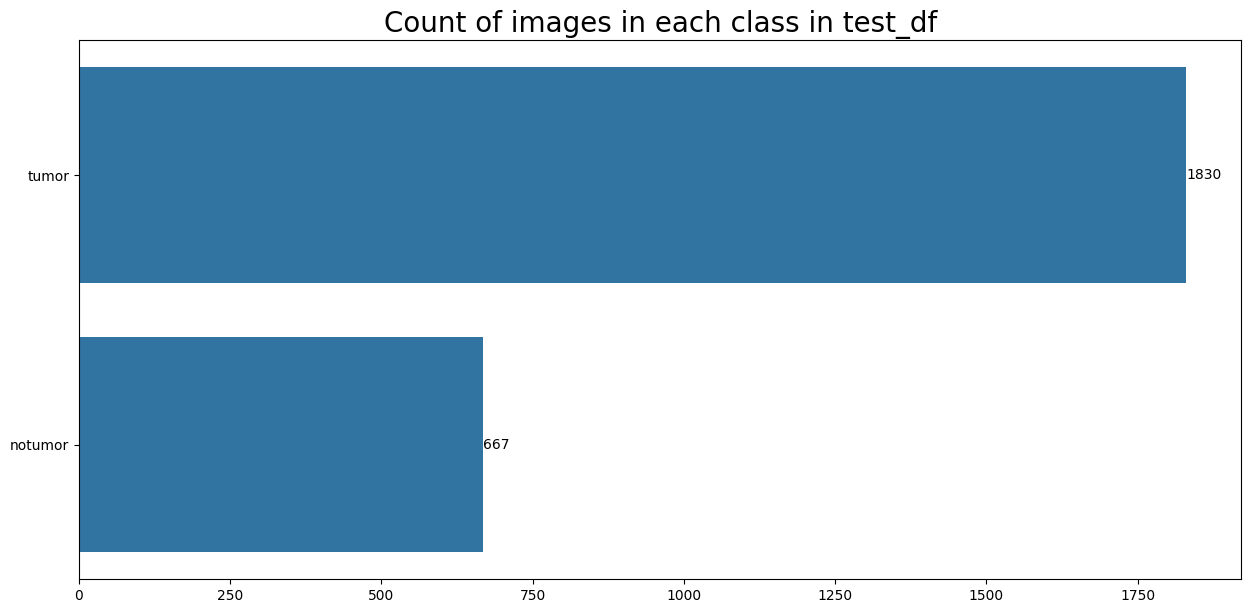

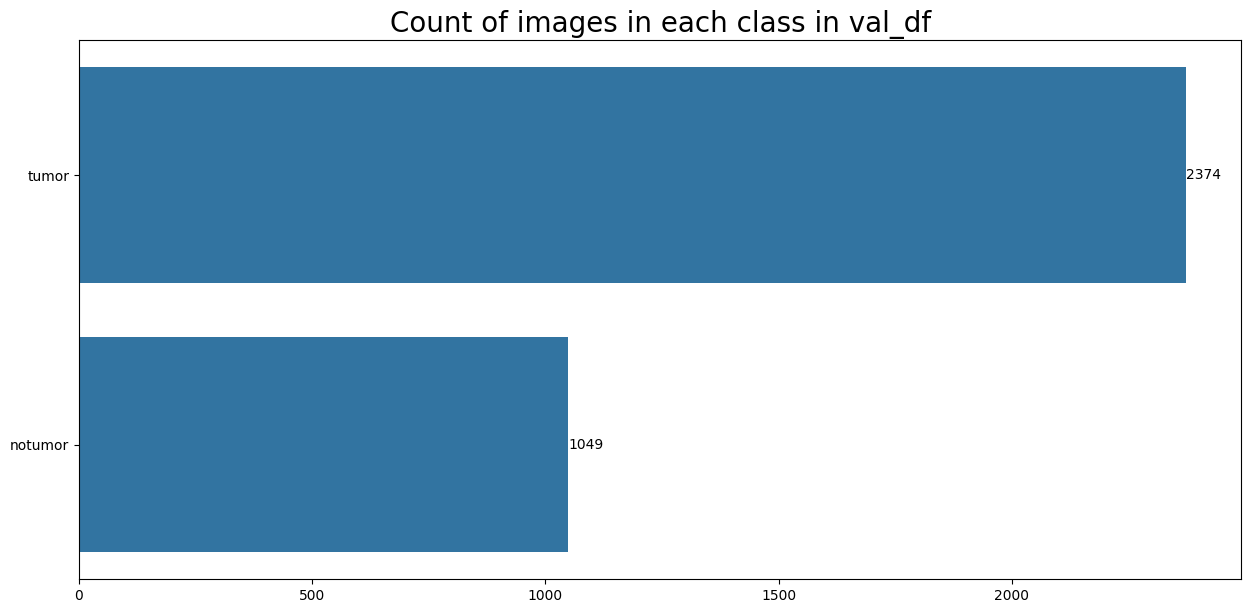

In [138]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train_df , y=train_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class in training df', fontsize=20)
ax.bar_label(ax.containers[0])

plt.figure(figsize=(15,7))
ax = sns.countplot(data=testing_df , y=testing_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class in test_df', fontsize=20)
ax.bar_label(ax.containers[0])

plt.figure(figsize=(15,7))
ax = sns.countplot(data=val_df , y=val_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class in val_df', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

# 3.Preprocess

In [ ]:
batch_size = 32
img_size = (128, 128)

scale = ImageDataGenerator(rescale=1/255)
#scale_gen = ImageDataGenerator(rescale=1/255, brightness_range=(0.8,1.2))

#train_scale_gen = scale_gen.flow_from_dataframe(train_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size, class_mode="binary")

train_scale = scale.flow_from_dataframe(train_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size, class_mode="binary")

#val_scale_gen = scale_gen.flow_from_dataframe(val_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size, class_mode="binary")


val_scale = scale.flow_from_dataframe(val_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size, class_mode="binary")

test_scale = scale.flow_from_dataframe(testing_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size, class_mode="binary", shuffle = False)

Found 7987 validated image filenames belonging to 2 classes.
Found 7987 validated image filenames belonging to 2 classes.
Found 3423 validated image filenames belonging to 2 classes.
Found 3423 validated image filenames belonging to 2 classes.
Found 2495 validated image filenames belonging to 2 classes.


/home/aurore/.pyenv/versions/brain-env/lib/python3.10/site-packages/keras/preprocessing/image.py:1139: UserWarning: Found 2 invalid image filename(s) in x_col="Class Path". These filename(s) will be ignored.
  warnings.warn(


In [88]:
len(train_df)

7987

# 4.Tuned Model => the one to keep

In [158]:
def initialize_model():

    model = Sequential()
    model.add(Input(shape=(128, 128, 3)))

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(16, (4, 4), padding ='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    ### Third Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))


    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(32, activation='relu'))

    ### Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))

    ### Model compilation
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', Recall(), Precision()])
    return model

In [159]:
model = initialize_model()
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 128, 128, 16)      784       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 flatten_20 (Flatten)        (None, 26912)           

In [160]:
es = EarlyStopping(patience = 2, restore_best_weights=True )
history = model.fit(train_scale,
                 epochs=20,
                 validation_data=val_scale,
                 callbacks = [es])

Epoch 1/20
250/250 [==============================] - 19s 73ms/step - loss: 0.3435 - accuracy: 0.8565 - recall_20: 0.9281 - precision_20: 0.8730 - val_loss: 0.1713 - val_accuracy: 0.9381 - val_recall_20: 0.9714 - val_precision_20: 0.9412
Epoch 2/20
250/250 [==============================] - 21s 85ms/step - loss: 0.1522 - accuracy: 0.9442 - recall_20: 0.9588 - precision_20: 0.9606 - val_loss: 0.1460 - val_accuracy: 0.9460 - val_recall_20: 0.9832 - val_precision_20: 0.9415
Epoch 3/20
250/250 [==============================] - 21s 82ms/step - loss: 0.0972 - accuracy: 0.9644 - recall_20: 0.9722 - precision_20: 0.9764 - val_loss: 0.0998 - val_accuracy: 0.9655 - val_recall_20: 0.9777 - val_precision_20: 0.9728
Epoch 4/20
250/250 [==============================] - 21s 83ms/step - loss: 0.0648 - accuracy: 0.9785 - recall_20: 0.9810 - precision_20: 0.9878 - val_loss: 0.0931 - val_accuracy: 0.9696 - val_recall_20: 0.9827 - val_precision_20: 0.9737
Epoch 5/20
250/250 [============================

In [161]:
def plot_history(history):

    fig, ax = plt.subplots(4, 1, figsize=(8,13))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")


    ax[2].set_title('Recall')

    ax[2].plot(history.epoch, history.history["recall_20"], label="Train recall")
    ax[2].plot(history.epoch, history.history["val_recall_20"], label="Validation recall")

    ax[3].set_title('Precision')

    ax[3].plot(history.epoch, history.history["precision_20"], label="precision")
    ax[3].plot(history.epoch, history.history["val_precision_20"], label="Validation precision")


    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()

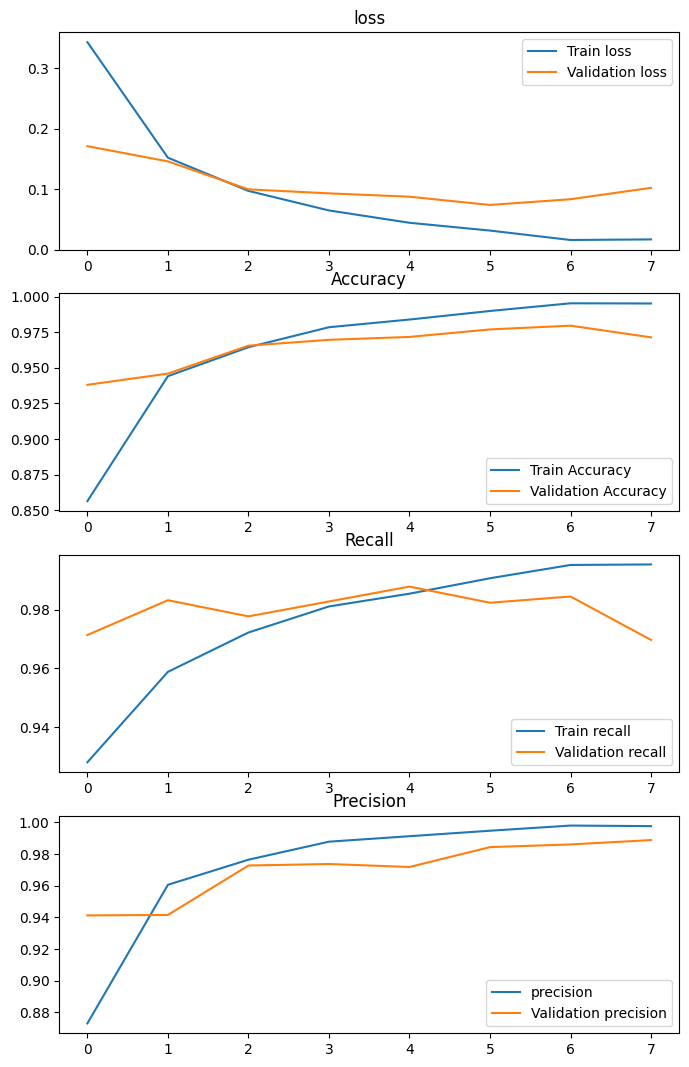

In [162]:

plot_history(history)


In [163]:
model.evaluate(test_scale)

78/78 [==============================] - 2s 27ms/step - loss: 0.1178 - accuracy: 0.9703 - recall_20: 0.9628 - precision_20: 0.9966


[0.11780707538127899,
 0.9703406691551208,
 0.9628415107727051,
 0.9966063499450684]

In [164]:
predictions = model.predict(test_scale, steps=len(test_scale))

78/78 [==============================] - 2s 26ms/step


In [165]:
y_pred = (predictions > 0.5).astype(int).ravel()


In [166]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_scale.classes, y_pred)


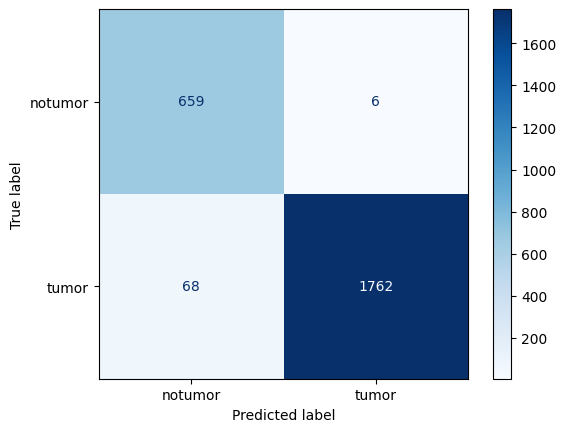

In [167]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_scale.class_indices.keys())
disp.plot(cmap='Blues')


In [30]:
predictions

array([[9.9958163e-01],
       [9.9988550e-01],
       [9.9852210e-01],
       ...,
       [1.0824245e-03],
       [8.2780018e-02],
       [5.8425387e-04]], dtype=float32)

# 5.KFOLD stratify cross validation

In [169]:
%%time

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

skf.get_n_splits(training_df, training_df['Class'])



results = []
es = EarlyStopping(patience = 2, restore_best_weights=True )

for train_index, test_index in skf.split(training_df, training_df['Class']):
#     # Split the data into train and test

    train_df, val_df = training_df.iloc[train_index], training_df.iloc[test_index]

#     # Scaling your data


    train_scale_gen = scale_gen.flow_from_dataframe(train_df, x_col='Class Path',
                                    y_col='Class', batch_size=batch_size,
                                    target_size=img_size, class_mode="binary")

    train_scale = scale.flow_from_dataframe(train_df, x_col='Class Path',
                                    y_col='Class', batch_size=batch_size,
                                    target_size=img_size, class_mode="binary")

    val_scale_gen = scale_gen.flow_from_dataframe(val_df, x_col='Class Path',
                                        y_col='Class', batch_size=batch_size,
                                        target_size=img_size, class_mode="binary")


    val_scale = scale.flow_from_dataframe(val_df, x_col='Class Path',
                                        y_col='Class', batch_size=batch_size,
                                        target_size=img_size, class_mode="binary")


    # 3. Model
    model = initialize_model()
    history = model.fit(train_scale,
                 epochs=20,
                 validation_data=val_scale,
                 callbacks = [es])

    # 4. Evaluation

    results.append(model.evaluate(val_scale))

Found 9128 validated image filenames belonging to 2 classes.
Found 9128 validated image filenames belonging to 2 classes.
Found 2282 validated image filenames belonging to 2 classes.
Found 2282 validated image filenames belonging to 2 classes.
Epoch 1/20
286/286 [==============================] - 25s 85ms/step - loss: 0.2481 - accuracy: 0.9041 - recall_22: 0.9384 - precision_22: 0.9245 - val_loss: 0.1350 - val_accuracy: 0.9535 - val_recall_22: 0.9653 - val_precision_22: 0.9677
Epoch 2/20
286/286 [==============================] - 25s 88ms/step - loss: 0.1068 - accuracy: 0.9645 - recall_22: 0.9768 - precision_22: 0.9722 - val_loss: 0.0926 - val_accuracy: 0.9693 - val_recall_22: 0.9665 - val_precision_22: 0.9890
Epoch 3/20
286/286 [==============================] - 24s 84ms/step - loss: 0.0619 - accuracy: 0.9808 - recall_22: 0.9864 - precision_22: 0.9859 - val_loss: 0.1185 - val_accuracy: 0.9606 - val_recall_22: 0.9476 - val_precision_22: 0.9954
Epoch 4/20
286/286 [======================

In [170]:
results

[[0.07427244633436203,
  0.9754601120948792,
  0.9728363752365112,
  0.9916291236877441],
 [0.1050979495048523,
  0.9763365387916565,
  0.9898926019668579,
  0.9763239622116089],
 [0.09821225702762604,
  0.9776511788368225,
  0.9816803336143494,
  0.9860405921936035],
 [0.10468648374080658,
  0.9776511788368225,
  0.9860935807228088,
  0.9817495346069336],
 [0.07896876335144043,
  0.9798422455787659,
  0.983565092086792,
  0.9873096346855164]]

In [ ]:
results

[[0.10014554858207703,
  0.9684487581253052,
  0.9696778059005737,
  0.9846054911613464],
 [0.09823315590620041,
  0.9745836853981018,
  0.9823120832443237,
  0.9810725450515747],
 [0.09870567917823792,
  0.9745836853981018,
  0.9842072129249573,
  0.9792582988739014],
 [0.08031488955020905,
  0.9719544053077698,
  0.9797724485397339,
  0.9797724485397339],
 [0.09186454117298126,
  0.9785276055335999,
  0.982300877571106,
  0.9866666793823242]]

In [171]:
accuracy = np.mean([sublist[1] for sublist in results])
accuracy

0.9773882508277894

In [172]:
recall = np.mean([sublist[2] for sublist in results])
recall

0.9828135967254639

In [173]:
precision = np.mean([sublist[3] for sublist in results])
precision

0.9846105694770813

In [175]:
model.evaluate(test_scale)

78/78 [==============================] - 2s 25ms/step - loss: 0.0859 - accuracy: 0.9792 - recall_26: 0.9754 - precision_26: 0.9961


[0.08587058633565903, 0.979158341884613, 0.9754098653793335, 0.99609375]

In [174]:
predictions = model.predict(test_scale, steps=len(test_scale))
y_pred = (predictions2 > 0.5).astype(int).ravel()

78/78 [==============================] - 2s 26ms/step


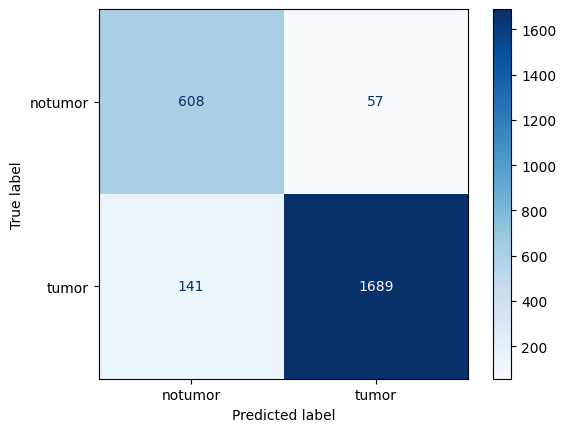

In [176]:
cm = confusion_matrix(test_scale.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_scale.class_indices.keys())
disp.plot(cmap='Blues')

# fit sur tout le train

In [177]:
model = initialize_model()

train_scale_total = scale.flow_from_dataframe(training_df, x_col='Class Path',
                                    y_col='Class', batch_size=batch_size,
                                    target_size=img_size, class_mode="binary")

model.fit(train_scale_total,
                 epochs=20,
                 callbacks = [es])


Found 11410 validated image filenames belonging to 2 classes.
Epoch 1/20
357/357 [==============================] - 23s 63ms/step - loss: 0.3491 - accuracy: 0.8466 - recall_27: 0.9436 - precision_27: 0.8513
Epoch 2/20
357/357 [==============================] - 26s 72ms/step - loss: 0.1493 - accuracy: 0.9500 - recall_27: 0.9613 - precision_27: 0.9665
Epoch 3/20
357/357 [==============================] - 28s 79ms/step - loss: 0.0878 - accuracy: 0.9717 - recall_27: 0.9771 - precision_27: 0.9820
Epoch 4/20
357/357 [==============================] - 27s 75ms/step - loss: 0.0574 - accuracy: 0.9810 - recall_27: 0.9828 - precision_27: 0.9897
Epoch 5/20
357/357 [==============================] - 24s 68ms/step - loss: 0.0365 - accuracy: 0.9884 - recall_27: 0.9882 - precision_27: 0.9950
Epoch 6/20
357/357 [==============================] - 25s 69ms/step - loss: 0.0294 - accuracy: 0.9900 - recall_27: 0.9904 - precision_27: 0.9952
Epoch 7/20
357/357 [==============================] - 25s 69ms/step 

In [178]:
predictions = model.predict(test_scale, steps=len(test_scale))
y_pred = (predictions > 0.5).astype(int).ravel()
cm = confusion_matrix(test_scale.classes, y_pred)

78/78 [==============================] - 2s 26ms/step


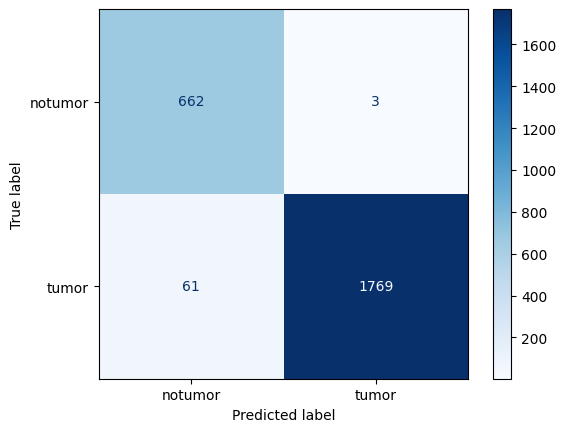

In [179]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_scale.class_indices.keys())
disp.plot(cmap='Blues')

In [180]:
model.evaluate(test_scale)

78/78 [==============================] - 2s 25ms/step - loss: 0.1915 - accuracy: 0.9743 - recall_27: 0.9667 - precision_27: 0.9983


[0.19146957993507385,
 0.9743487238883972,
 0.9666666388511658,
 0.9983069896697998]

# avec data augmentation dans le model 

In [ ]:
def initialize_model_augmented():

    model = Sequential()
    model.add(Input(shape=(128, 128, 3)))


    model.add(layers.RandomFlip("horizontal"))
    model.add(layers.RandomRotation(0.05))
    model.add(layers.RandomZoom(0.05))
    model.add(layers.RandomTranslation(0.05, 0.05))

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(32, (4, 4), padding ='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3, 3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2, 2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(32, activation='relu'))

    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(1, activation='sigmoid'))

    ### Model compilation
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', Recall(), Precision()])
    return model

In [126]:
model2 = initialize_model_augmented()
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_9 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_9 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_9 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 random_translation_9 (Rando  (None, 128, 128, 3)      0         
 mTranslation)                                                   
                                                                 
 conv2d_34 (Conv2D)          (None, 128, 128, 32)      1568      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 64, 64, 32)     

In [127]:
val_df, train_df = train_test_split(training_df, train_size=0.3, stratify=training_df['Class'], random_state=42)

In [128]:
train_scale = scale.flow_from_dataframe(train_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size, class_mode="binary")

val_scale = scale.flow_from_dataframe(val_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size, class_mode="binary")

Found 7987 validated image filenames belonging to 2 classes.
Found 3423 validated image filenames belonging to 2 classes.


In [129]:
history = model2.fit(train_scale,
                 epochs=20,
                 validation_data=val_scale,
                 callbacks = [es])


Epoch 1/20
250/250 [==============================] - 37s 136ms/step - loss: 0.4695 - accuracy: 0.7731 - recall_17: 0.8857 - precision_17: 0.8062 - val_loss: 0.3855 - val_accuracy: 0.8294 - val_recall_17: 0.7780 - val_precision_17: 0.9701
Epoch 2/20
250/250 [==============================] - 37s 148ms/step - loss: 0.3053 - accuracy: 0.8868 - recall_17: 0.9384 - precision_17: 0.9023 - val_loss: 0.7154 - val_accuracy: 0.6500 - val_recall_17: 0.4992 - val_precision_17: 0.9925
Epoch 3/20
250/250 [==============================] - 36s 145ms/step - loss: 0.2797 - accuracy: 0.8947 - recall_17: 0.9377 - precision_17: 0.9128 - val_loss: 0.2122 - val_accuracy: 0.9182 - val_recall_17: 0.9457 - val_precision_17: 0.9370
Epoch 4/20
250/250 [==============================] - 36s 144ms/step - loss: 0.2574 - accuracy: 0.9000 - recall_17: 0.9379 - precision_17: 0.9195 - val_loss: 0.3837 - val_accuracy: 0.8104 - val_recall_17: 0.7460 - val_precision_17: 0.9747
Epoch 5/20
250/250 [========================

In [130]:
def plot_history2(history):

    fig, ax = plt.subplots(4, 1, figsize=(8,13))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")


    ax[2].set_title('Recall')

    ax[2].plot(history.epoch, history.history["recall_17"], label="Train recall")
    ax[2].plot(history.epoch, history.history["val_recall_17"], label="Validation recall")

    ax[3].set_title('Precision')

    ax[3].plot(history.epoch, history.history["precision_17"], label="precision")
    ax[3].plot(history.epoch, history.history["val_precision_17"], label="Validation precision")


    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    ax[3].legend()

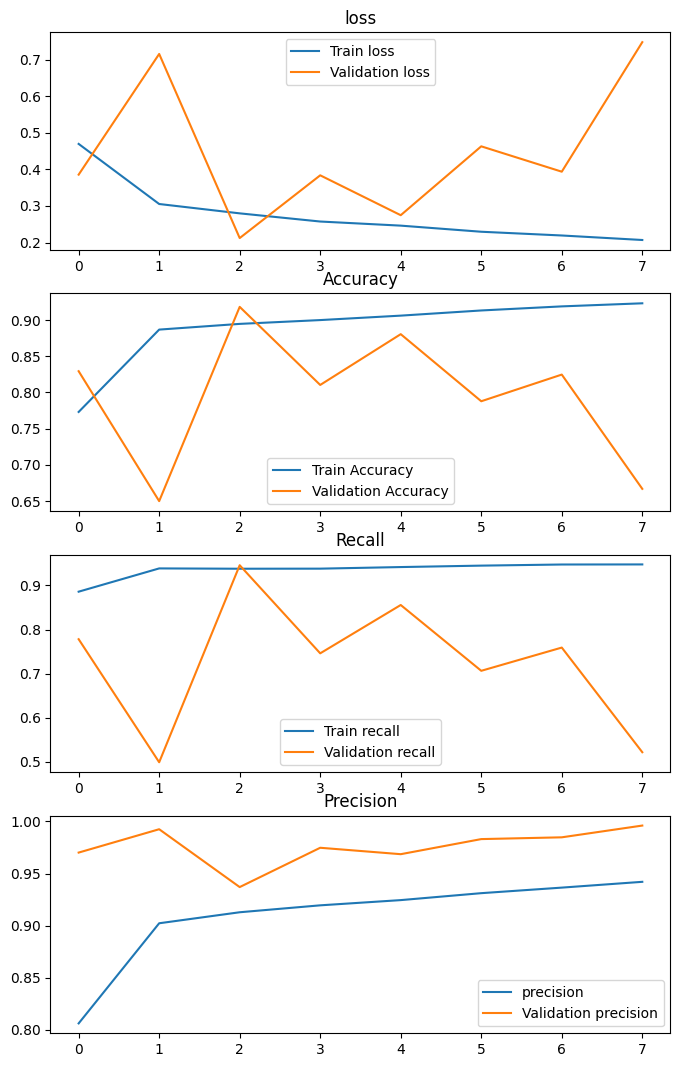

In [131]:

plot_history2(history)

In [132]:
model2.evaluate(test_scale)


78/78 [==============================] - 3s 33ms/step - loss: 0.2290 - accuracy: 0.9206 - recall_17: 0.9230 - precision_17: 0.9674


[0.22895091772079468, 0.920641303062439, 0.922950804233551, 0.9673539400100708]

In [133]:
predictions2 = model2.predict(test_scale, steps=len(test_scale))
y_pred2 = (predictions2 > 0.5).astype(int).ravel()

78/78 [==============================] - 2s 27ms/step


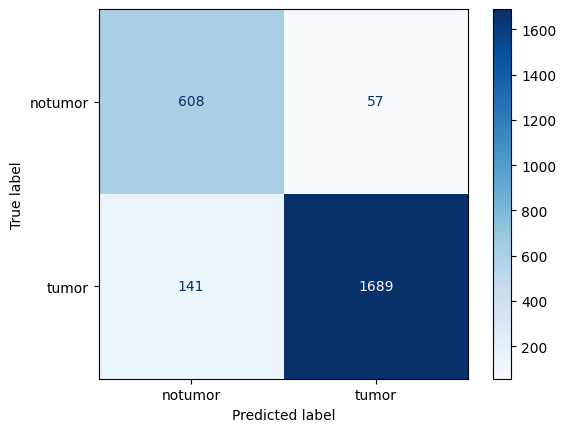

In [134]:
cm = confusion_matrix(test_scale.classes, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_scale.class_indices.keys())
disp.plot(cmap='Blues')

In [123]:
%%time

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

skf.get_n_splits(training_df, training_df['Class'])



results2 = []
es = EarlyStopping(patience = 5, restore_best_weights=True )

for train_index, test_index in skf.split(training_df, training_df['Class']):
#     # Split the data into train and test

    train_df, val_df = training_df.iloc[train_index], training_df.iloc[test_index]

#     # Scaling your data


    train_scale_gen = scale_gen.flow_from_dataframe(train_df, x_col='Class Path',
                                    y_col='Class', batch_size=batch_size,
                                    target_size=img_size, class_mode="binary")

    train_scale = scale.flow_from_dataframe(train_df, x_col='Class Path',
                                    y_col='Class', batch_size=batch_size,
                                    target_size=img_size, class_mode="binary")

    val_scale_gen = scale_gen.flow_from_dataframe(val_df, x_col='Class Path',
                                        y_col='Class', batch_size=batch_size,
                                        target_size=img_size, class_mode="binary")


    val_scale = scale.flow_from_dataframe(val_df, x_col='Class Path',
                                        y_col='Class', batch_size=batch_size,
                                        target_size=img_size, class_mode="binary")


    # 3. Model
    model2 = initialize_model_augmented()
    history = model2.fit(train_scale,
                 epochs=20,
                 validation_data=val_scale,
                 callbacks = [es])

    # 4. Evaluation

    results2.append(model2.evaluate(val_scale))

Found 9128 validated image filenames belonging to 2 classes.
Found 9128 validated image filenames belonging to 2 classes.
Found 2282 validated image filenames belonging to 2 classes.
Found 2282 validated image filenames belonging to 2 classes.
Epoch 1/20
286/286 [==============================] - 52s 172ms/step - loss: 0.4823 - accuracy: 0.7763 - recall_14: 0.9139 - precision_14: 0.7944 - val_loss: 0.4207 - val_accuracy: 0.8181 - val_recall_14: 0.7568 - val_precision_14: 0.9756
Epoch 2/20
286/286 [==============================] - 40s 140ms/step - loss: 0.3090 - accuracy: 0.8799 - recall_14: 0.9283 - precision_14: 0.9015 - val_loss: 0.3505 - val_accuracy: 0.8545 - val_recall_14: 0.8155 - val_precision_14: 0.9699
Epoch 3/20
286/286 [==============================] - 40s 139ms/step - loss: 0.2801 - accuracy: 0.8878 - recall_14: 0.9292 - precision_14: 0.9108 - val_loss: 0.3113 - val_accuracy: 0.8738 - val_recall_14: 0.8370 - val_precision_14: 0.9779
Epoch 4/20
286/286 [===================

KeyboardInterrupt: 

In [125]:
accuracy2 = np.mean([sublist[1] for sublist in results2])
recall2 = np.mean([sublist[2] for sublist in results2])
precision2 = np.mean([sublist[3] for sublist in results2])
print("first model: " ,(accuracy, precision, recall),
        "second model :", (accuracy2, precision2, recall2))

first model:  (0.9736196279525757, 0.9822750926017761, 0.9796540856361389) second model : (0.9261612594127655, 0.9709852039813995, 0.9210360050201416)
